In [4]:
import math
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import os
from PIL import Image

g = 9.81
L = 1 # длина нити
m = float(input('Введите массу: '))
st = 0 # начальное время
et = float(input('Введите конечное время, которое будет показано на графике: '))
ts = 0.1 # временной шаг
b = 0.5 # коэффициент сопротивления
# b = 8 
alpha1_ini = 0 # начальное положение (рад)
alpha2_ini = float(input('Введите начальную скорость (рад/с): '))

Введите массу: 0.5
Введите конечное время, которое будет показано на графике: 7
Введите начальную скорость (рад/с): 3


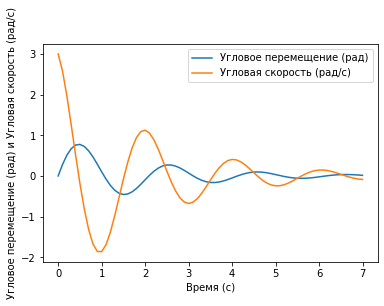

In [5]:
def pen(t, alpha):
    dalpha2_dt = (-b/m)*alpha[1] + (-g/L)*np.sin(alpha[0])
    dalpha1_dt = alpha[1]
    return [dalpha1_dt, dalpha2_dt]

alpha_ini = [alpha1_ini, alpha2_ini]
t_span = [st, et+ts]
t = np.arange(st, et+ts, ts)
sim_points = len(t)
l = np.arange(0, sim_points, 1)

alpha12 = solve_ivp(pen, t_span, alpha_ini, t_eval = t)
alpha1 = alpha12.y[0, :]
alpha2 = alpha12.y[1, :]

plt.plot(t, alpha1, label = 'Угловое перемещение (рад)')
plt.plot(t, alpha2, label = 'Угловая скорость (рад/с)')
plt.xlabel('Время (с)')
plt.ylabel('Угловое перемещение (рад) и Угловая скорость (рад/с)')
plt.legend()
plt.show()


x = L*np.sin(alpha1)
y = -L*np.cos(alpha1)
kk=0


for point in l:
    plt.figure()
    plt.plot(x[point], y[point], 'bo', markersize = 20)
    plt.plot([0, x[point]], [0, y[point]])
    plt.xlim(-L-1, L+1)
    plt.ylim(-L-0.5, L+0.5)
    plt.xlabel('x-direction')
    plt.ylabel('y-dir')
    filenumber = point
    filenumber = format(filenumber, "05")
    filename = "image{}.png".format(filenumber)
    plt.savefig(filename)
    plt.close()
    kk +=1

    
frames = []
for filenumber in range(0, kk):
    frame = Image.open(f'image{format(filenumber, "05")}.png')
    frames.append(frame)

    
frames[0].save(
    '1project.gif',
    save_all=True,
    append_images=frames[1:],
    optimize=True,
    duration=100,
    loop=0
)

# ffffffff

